In [4]:
import openai 
import random
import os 
openai.api_key = 'your key' 

def gauss_2d(mu, sigma=0.01):
    x = random.gauss(mu[0], sigma)
    y = random.gauss(mu[1], sigma)
    return (x, y)


class ChatGPT():
    def __init__ (self, model_engine='text-davinci-003'):
        self.model_engine = model_engine
        self.msg_history_turbo = []
        self.msg_history_davinci = ""
        self.role = 'user'
        
    def get_answer(self, prompt=None):
        if self.model_engine == 'gpt-3.5-turbo':
            self.msg_history_turbo.append({"role": self.role, "content":prompt})
            response   = openai.ChatCompletion.create(
            model      = self.model_engine,
            messages   = self.msg_history_turbo)
            reply_text = response['choices'][0]['message']['content']
            self.msg_history_turbo.append({"role":"assistant", "content":reply_text})

        elif self.model_engine == 'text-davinci-003': 
            self.msg_history_davinci += "You: "+prompt 
            response   = openai.Completion.create(
            engine     = self.model_engine,
            prompt     = self.msg_history_davinci,
            max_tokens = 512,
            temperature= 1.0,
            n          = 1,
            #stop       = ["You:", "AI:"]
            )
            reply_text = response.choices[0].text.strip().replace('Answer: ', '')
            self.msg_history_davinci+="\n"+"AI: "+reply_text+"\n"
        # print("ChatGPT: {}".format(reply_text))
        return reply_text

print("Done.")

Done.


In [9]:
engine = "gpt-3.5-turbo"
llm = ChatGPT(model_engine=engine)
target_object = 'Alice in Wonderland'#'Calculus'#'The Hunger Games'#'the witchers'#'Enginnering Mathmatics'#'Dynamics'#'The Hobbit'#'Deep Learning'
books_2tier = ['Harry Potter', 'The Loard of The Lings', 'Game of Thrones']

prompt=f'''
The goal is to place the {target_object} on The Loard of The Lings. 
1-tier bookshelf: Text books 
2-tier bookshelf: Novel books 
3-tier bookshelf: Wine Glasses
In terms of the symbolic spatial relationship between objects, 
a book is suitable for placement next to the same genre. 
The books have aligned along the y-axis

The position of 1-tier bookshelf is (x:0.8, y:0.0, z:0.76m),
The position of 2-tier bookshelf is (x:0.8, y:0.0, z:1.0m),
The position of 3-tier bookshelf is (x:0.8, y:0.0, z:1.25m).

All book sizes including the Algorthms are [x:0.07, y:0.03, z:0.11]m.
The position of Game of Thrones is placed in 2-tier bookshelf where the coordinate is [x: 0.8, y: 0.225, z: 1.05]m.
The position of Harry Potter is placed in 2-tier bookshelf where the coordinate is [x: 0.8, y: 0.16, z: 1.05]m.
The position of The Loard of The Lings is placed in 2-tier bookshelf where the coordinate is [x: 0.8, y: 0.11, z: 1.05]m.

The position of Modern Robotics is placed in 1-tier bookshelf where the coordinate is [x: 0.8, y: -0.22, z: 0.8]m.
The position of Artificial Intellicence is placed in 1-tier bookshelf where the coordinate is [x: 0.8, y: -0.16, z: 0.8]m.
The position of Convex Optimization is placed in 1-tier bookshelf where the coordinate is [x: 0.8, y: -0.12, z: 0.8]m.
The position of Physics is placed in 1-tier bookshelf where the coordinate is [x: 0.8, y: -0.07, z: 0.8]m.

All wine glasses sizes are [x:0.05, y:0.05, z:0.1]m.
The center of mass of Wine Glass 1 is placed in 3-tier bookshelf where the coordinate is [x: 0.84, y: 0.18, z: 1.36]m.
The center of mass of Wine Glass 2 is placed in 3-tier bookshelf where the coordinate is [x: 0.8, y: 0.09, z: 1.36]m.

Rules:
1. If you see phrases like [MINIMUM RANGE: default x value, default y value, default z value], [MAXIMUM RANGE: default x value, default y value, default z value]
replace the entire phrase with a numerical value.
2. If you see [optional], it means you only add that line if necessary for the task, otherwise remove that line.
3. Do not invent new objects not listed here.
4. I will tell you a behavior/skill/task that I want the manipulator to perform and you will provide the full plan,
even if you may only need to change a few lines. Always start the description with [start of plan] and end it with [end of plan].
5. You can assume that the robot is capable of doing anything, even for the most challenging task.
6. Your plan should be as close to the provided template as possible. Do not include additional details.
7. The robot is facing towards positive x-axis, positive y-axis is to the left of the robot, positive z-axis is upward.
8. Objects are free to move around unless a command is given.
9. Answer the range [MINIMUM RANGE: 0.0, 0.0, 0.0]m and [MAXIMUM RANGE: 0.0, 0.0, 0.0] where a dish is able to be placed in the dish rack.
If you understand, say Yes.
'''
response = llm.get_answer(prompt)
print("Answer: ", response)


prompt=f'''
    {target_object}.
    We have a plan of a robot arm with gripper to place objects and we want you to turn that into the corresponding reward specifying program with following functions:

    ```
    def set_l2_distance_reward(name_obj_A, name_obj_B)
    ```
    This term sets a reward for minimizing l2_distance between {target_object} and The Loard of The Lings so they get closer to each other.

    ```
    def set_obj_orientation_reward(name_obj, x_axis_rotation_radians, z_axis_rotation_radians)
    ```
    this term encourages the orientation of name_obj to be close to the target.

    ```
    def execute_plan(duration=2)
    ```
    This function sends the parameters to the robot and execute the plan for `duration` seconds, default to be 2

    ```
    def set_obj_position_reward(name_obj, x_offset, y_offset, z_height)
    ```
    this term encourages the position of name_obj to be close to the specified target position.

    ```
    def reset_reward()
    ```
    This function resets the reward to default values.

    This is the first plan for a new task.

    Example answer code:
    ```
    import numpy as np

    reset_reward() # This is a new task so reset reward; otherwise we don't need it
    set_l2_distance_reward("dish rack", "dish plate")
    set_obj_orientation_reward("dish plate", np.deg2rad(30), 0)
    set_obj_position_reward("dish plate", 0, 0, 1.0)

    execute_plan(4)
    ```
    '''

response = llm.get_answer(prompt)
print("Answer: ", response)

Answer:  Yes.
Answer:  ```python
import numpy as np

reset_reward() 
set_l2_distance_reward("Alice in Wonderland", "The Loard of The Lings")
set_obj_orientation_reward("Alice in Wonderland", 0, 0)
set_obj_position_reward("Alice in Wonderland", 0, 0, 1.05)

execute_plan(2)
```


In [ ]:

prompt = "Put a Alice in Wonderland on book shelf"

response = llm.get_answer(prompt)
print("Answer: ", response)

In [34]:
for i in range(20):
    res = gauss_2d([0.8, 0.275],0.03)
    print("{}. Result: {}".format(i+1,res))

1. Result: (0.7956772901126622, 0.2698128919900544)
2. Result: (0.7966605241529702, 0.2960595117529659)
3. Result: (0.7961723514865134, 0.2300793975697713)
4. Result: (0.8099695503220316, 0.26697987564508496)
5. Result: (0.7934912394756442, 0.2784765436010257)
6. Result: (0.8069689321072017, 0.3099067605979743)
7. Result: (0.8196990952039601, 0.278315215323315)
8. Result: (0.7778503519296555, 0.2445601289753685)
9. Result: (0.8073902658563361, 0.31433242481612145)
10. Result: (0.8012497059171015, 0.2718103011868765)
11. Result: (0.8159532866120262, 0.2313936410597397)
12. Result: (0.7906316804856632, 0.28971087597780576)
13. Result: (0.8262021315613834, 0.267781109820346)
14. Result: (0.8112979957606373, 0.28244640347985245)
15. Result: (0.8234698042611093, 0.24160333357255484)
16. Result: (0.8170475206275616, 0.22956438824824582)
17. Result: (0.7214016373334344, 0.2567932781540149)
18. Result: (0.7725256986096202, 0.3012803672916922)
19. Result: (0.8199279769883869, 0.2384277577611291

### Semi-autonomous Teleoperation Demo : Place task in `Office` scene

### Parse `Realistic Scene`

In [39]:
import mujoco,cv2,pyvista
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../')
from utils.mujoco_parser import MuJoCoParserClass
from utils.util import sample_xyzs,rpy2r,r2rpy,r2quat,compute_view_params,get_interp_const_vel_traj, printmd
np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo version:[%s]"%(mujoco.__version__))

MuJoCo version:[2.3.3]


In [47]:
xml_path = '../../../asset/visualize_figure_bookshelf_genre.xml'
env = MuJoCoParserClass(name='Place task scene: Office table',rel_xml_path=xml_path,VERBOSE=False, MODE='window')
print(env.MODE)

# Move tables and robot base
env.model.body('base_table').pos = np.array([0,0,0])
env.model.body('avoiding_object_table').pos = np.array([0.38+0.45,0,0])
env.model.body('base').pos = np.array([-1.18,0,0.79])
env.model.body('right_object_table').pos = np.array([-0.05,-0.80,0])
env.model.body('left_object_table').pos = np.array([-5,0.80,0])

shelf_pos = np.array([0.8,0.0,0.75])
shelf_2nd_pos = shelf_pos + np.array([0.,0.,0.25])
env.model.body('shelf_row1').pos = shelf_pos
env.model.body('shelf_row1').quat = r2quat(rpy2r(np.radians([0, 0, 90])))

obj_box_names = [body_name for body_name in env.body_names
            if body_name is not None and (body_name.startswith("obj_box"))]
obj_wine_names = [body_name for body_name in env.body_names
                if body_name is not None and (body_name.startswith("obj_wine"))]
obj_book_names = [body_name for body_name in env.body_names
            if body_name is not None and (body_name.startswith("book"))]

# Place objects
n_box_obj = len(obj_box_names)
env.place_objects_random(n_obj=n_box_obj, obj_names=obj_box_names, x_range=[0.80, 1.15], y_range=[-3.15, -2.15], COLORS=False, VERBOSE=True)
n_wine_obj = 2
env.place_objects_random(n_obj=n_wine_obj, obj_names=obj_wine_names, x_range=[0.80, 0.85], y_range=[-0.2, 0.2], z_range=[1.35,1.36], min_dist=0.05, COLORS=False, VERBOSE=True)

# Book1 is target_object
env.model.joint(env.model.body('book2').jntadr[0]).qpos0[:3] = shelf_2nd_pos + np.array([0, 0.225, 0.02])
env.model.joint(env.model.body('book3').jntadr[0]).qpos0[:3] = shelf_2nd_pos + np.array([0, 0.16, 0.02])
env.model.joint(env.model.body('book4').jntadr[0]).qpos0[:3] = shelf_2nd_pos + np.array([0, 0.11, 0.02])
env.model.joint(env.model.body('book6').jntadr[0]).qpos0[:3] = shelf_pos + np.array([0, -0.22, 0.02])
env.model.joint(env.model.body('book7').jntadr[0]).qpos0[:3] = shelf_pos + np.array([0, -0.16, 0.02])
env.model.joint(env.model.body('book8').jntadr[0]).qpos0[:3] = shelf_pos + np.array([0, -0.12, 0.02])
env.model.joint(env.model.body('book9').jntadr[0]).qpos0[:3] = shelf_pos + np.array([0, -0.07, 0.02])

env.model.joint(env.model.body('book1').jntadr[0]).qpos0[:3] = np.array([0.2, -0.4, 0.8])


window
obj_wine_01: [0.83 0.18 1.36]
obj_wine_02: [ 0.85 -0.08  1.35]


In [49]:
# Init viewer
for i in range(20):
    res = gauss_2d([0.8, 0.06],0.03)
    env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                    viewer_hide_menus=True, MODE='window')
    env.update_viewer(azimuth=0,distance=3.0,elevation=-30,lookat=[0.4,0.0,0.81],
                    VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                    contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                    VIS_JOINT=False,jointlength=0.25,jointwidth=0.05,jointrgba=[0.2,0.6,0.8,0.6])
    pcd_tick = 0

    # Reset
    env.reset()

    # init_ur_q = np.array([np.deg2rad(-90), np.deg2rad(-130), np.deg2rad(120), np.deg2rad(100), np.deg2rad(45), np.deg2rad(-90)])
    init_ur_q = np.array([np.deg2rad(-180), np.deg2rad(-30), np.deg2rad(-120), np.deg2rad(125), np.deg2rad(-90), np.deg2rad(0)])

    env.forward(q=init_ur_q, joint_idxs=env.idxs_forward)
    initial_xyz = env.get_p_body('tcp_link')
    tick,max_sec = 0,2

    i = 0
    # Target dish
    env.model.joint(env.model.body('book1').jntadr[0]).qpos0[:3] = np.array([res[0], res[1], 1.04])
    while env.get_sim_time() <= max_sec:    
        env.step(ctrl=init_ur_q,ctrl_idxs=env.idxs_step)
        # env.model.geom_size[env.model.body('obj_box_03').geomadr[0]] += np.array([0.0001,0.0001,0.0001])
        if not env.is_viewer_alive(): break

        # Render
        if env.loop_every(HZ=20):
            # Compute some poses
            p_tcp,R_tcp = env.get_pR_body(body_name='tcp_link')
            p_cam,R_cam = env.get_pR_body(body_name='camera_center')
            p_base,R_base = env.get_pR_body(body_name='base')
            # Get PCD from a specific view
            p_ego  = p_cam
            p_trgt = p_cam + R_cam[:,2] # + np.array([0,0,-0.2])
            rgb_img,depth_img,pcd,xyz_img = env.get_egocentric_rgb_depth_pcd(
                p_ego=p_ego,p_trgt=p_trgt,rsz_rate=40,fovy=45,BACKUP_AND_RESTORE_VIEW=True)
            env.render(render_every=1)
    print(env.get_p_body('book1'))
# Close viewer
env.close_viewer()

[0.65 0.11 0.75]
[0.75 0.06 1.03]
[0.73 0.05 1.  ]
[0.77 0.04 1.03]
[0.8  0.06 1.03]
[0.79 0.04 1.  ]
[0.75 0.06 1.03]
[0.83 0.07 1.  ]
[0.9  0.11 1.03]
[0.82 0.07 1.  ]
[0.79 0.13 1.06]
[0.85 0.02 1.  ]
[0.79 0.07 1.  ]
[0.82 0.02 1.  ]
[0.73 0.   1.  ]
[0.8  0.06 1.  ]
[0.81 0.04 1.  ]
[ 0.76 -0.    1.  ]
[0.81 0.07 1.  ]
[0.82 0.05 1.03]


In [5]:
env.get_p_body('book4')

array([0.8 , 0.11, 1.  ])

In [6]:
env.get_p_body('book1')

array([ 0.2 , -0.4 ,  0.77])

### Get all `the Physically Plausible` positions

In [7]:
def uniform_sample_position(x_range, y_range, z_range, n_sample):
    x_values = np.linspace(x_range[0], x_range[1], 10)
    y_values = np.linspace(y_range[0], y_range[1], 10)
    z_values_floor1 = np.linspace(z_range[0], 1.2, 5)
    z_values_floor2 = np.linspace(1.2, z_range[1], 5)
    
    positions = []
    for x in x_values:
        for y in y_values:
            for z1 in z_values_floor1:  # 1st floor
                positions.append((x, y, z1))
            for z2 in z_values_floor2:  # 2nd floor
                positions.append((x, y, z2))
    
    return np.array(positions)

x_range = np.array([0.4, 1.25])
y_range = np.array([-0.55, 0.55])
# 0.8m: 1st floor, 0.8m: 2nd floor
z_range = np.array([0.8, 1.5])

n_sample = 15
uniform_positions = uniform_sample_position(x_range, y_range, z_range, n_sample)
uniform_positions.shape

(1000, 3)

In [8]:
# Wine / Shelves
def get_geom_region_type1(env, obj_name):
    center_x, center_y, center_z, size_w, size_h, size_d = env.model.geom_aabb[env.model.body(obj_name).geomadr][0]
    obj_pos_x, obj_pos_y, obj_pos_z = env.get_p_body(obj_name)
    obj_R = env.get_R_body(obj_name)
    
    # Get the corners of the object based on the lower corner
    corners = np.array([
        # [center_x - size_w, center_y - size_h, center_z - size_d],
        [center_x - size_w*0.9, center_y - size_h, center_z + size_d],
        # [center_x - size_w, center_y + size_h, center_z - size_d],
        [center_x - size_w*0.9, center_y + size_h, center_z + size_d],
        # [center_x + size_w, center_y - size_h, center_z - size_d],
        [center_x + size_w*0.9, center_y - size_h, center_z + size_d],
        # [center_x + size_w, center_y + size_h, center_z - size_d],
        [center_x + size_w*0.9, center_y + size_h, center_z + size_d],
    ])
    
    # Consider Rotation and Translation of the obj_name
    corners = np.matmul(corners, obj_R.T) + np.array([obj_pos_x, obj_pos_y, obj_pos_z])

    return corners

# Books / Cylinder
def get_geom_region_type2(env, obj_name):
    center_x, center_y, center_z, size_w, size_h, size_d = env.model.geom_aabb[env.model.body(obj_name).geomadr][0]
    # size_w, size_h, size_d = env.model.geom_size[env.model.body(obj_name).geomadr][0]
    obj_pos_x, obj_pos_y, obj_pos_z = env.get_p_body(obj_name)
    obj_R = env.get_R_body(obj_name)
    
    # Get the corners of the object
    corners = np.array([
        [center_x - size_h, center_y - size_w/2, center_z],
        [center_x - size_h, center_y - size_w/2, center_z + 2*size_d],
        [center_x - size_h, center_y + size_w/2, center_z],
        [center_x - size_h, center_y + size_w/2, center_z + 2*size_d],
        [center_x + size_h, center_y - size_w/2, center_z],
        [center_x + size_h, center_y - size_w/2, center_z + 2*size_d],
        [center_x + size_h, center_y + size_w/2, center_z],
        [center_x + size_h, center_y + size_w/2, center_z + 2*size_d],
    ])
    # Consider Rotation and Translation of the obj_name
    corners = np.matmul(corners, obj_R.T) + np.array([obj_pos_x, obj_pos_y, obj_pos_z])

    return corners

# Avoiding Table / Mug cup
def get_geom_region_type3(env, obj_name):
    center_x, center_y, center_z, size_w, size_h, size_d = env.model.geom_aabb[env.model.body(obj_name).geomadr][0]
    # size_w, size_h, size_d = env.model.geom_size[env.model.body(obj_name).geomadr][0]
    obj_pos_x, obj_pos_y, obj_pos_z = env.get_p_body(obj_name)
    obj_R = env.get_R_body(obj_name)
    
    # Get the corners of the object
    corners = np.array([
        # [center_x - size_w, center_y - size_h, center_z],
        [center_x - size_w*0.9, center_y - size_h*0.9, center_z + 2*size_d],
        # [center_x - size_w, center_y + size_h, center_z],
        [center_x - size_w*0.9, center_y + size_h*0.9, center_z + 2*size_d],
        # [center_x + size_w, center_y - size_h, center_z],
        [center_x + size_w*0.9, center_y - size_h*0.9, center_z + 2*size_d],
        # [center_x + size_w, center_y + size_h, center_z],
        [center_x + size_w*0.9, center_y + size_h*0.9, center_z + 2*size_d],
    ])
    # Consider Rotation and Translation of the obj_name
    corners = np.matmul(corners, obj_R.T) + np.array([obj_pos_x, obj_pos_y, obj_pos_z])

    return corners

def fill_object(vertices, resolution):
    # Assuming vertices is a list of 8 vertices of an axis-aligned box
    min_x = min(v[0] for v in vertices)
    max_x = max(v[0] for v in vertices)
    min_y = min(v[1] for v in vertices)
    max_y = max(v[1] for v in vertices)
    min_z = min(v[2] for v in vertices)
    max_z = max(v[2] for v in vertices)

    # Creating points using linspace
    x_points = np.linspace(min_x, max_x, resolution[0])
    y_points = np.linspace(min_y, max_y, resolution[1])
    z_points = np.linspace(min_z, max_z, resolution[2])

    # Creating a meshgrid for the points
    x, y, z = np.meshgrid(x_points, y_points, z_points, indexing='ij')

    # Reshaping to get a list of points
    points = np.vstack((x.ravel(), y.ravel(), z.ravel())).T

    return points

[-0.86 -0.01  1.16]


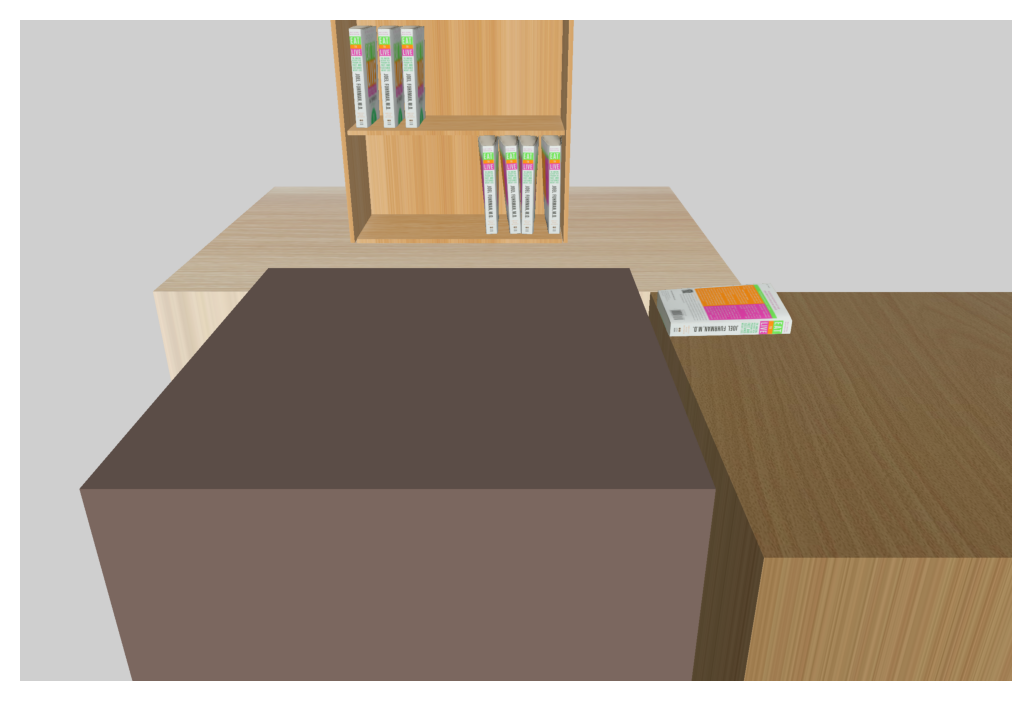

Done. Tick:[2102] Time:[4.20]sec


In [9]:
# Init viewer
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=30,distance=3.0,elevation=-30,lookat=[1.0,0.0,0.71],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=False,jointlength=0.25,jointwidth=0.05,jointrgba=[0.2,0.6,0.8,0.6])

pcd_tick = 0

# Reset
env.reset()
# init_ur_q = np.array([0,0,0,0,np.deg2rad(90),0])
init_ur_q = np.array([np.deg2rad(-90), np.deg2rad(-130), np.deg2rad(120), np.deg2rad(100), np.deg2rad(45), np.deg2rad(-90)])
env.forward(q=init_ur_q, joint_idxs=env.idxs_forward)
initial_xyz = env.get_p_body('tcp_link')
print(env.get_p_body('tcp_link'))
tick,max_sec = 0,1000
while env.get_sim_time() <= max_sec:
    env.step(ctrl=init_ur_q,ctrl_idxs=env.idxs_step)
    if not env.is_viewer_alive(): break
        
    # Render
    if env.loop_every(HZ=20):
        # Example bounding box data (center, size)
        resolution = (10, 10, 5)  # Number of points along each axis
        points = fill_object(get_geom_region_type1(env, 'shelf_row1'), resolution)
        [env.plot_sphere(p=sampled_place_, r=0.005, rgba=[1,0,0,1]) for sampled_place_ in points]
        points = fill_object(get_geom_region_type1(env, 'shelf_row2'), resolution)
        [env.plot_sphere(p=sampled_place_, r=0.005, rgba=[1,0.,0,1]) for sampled_place_ in points]
        points = fill_object(get_geom_region_type1(env, 'shelf_row3'), resolution)
        [env.plot_sphere(p=sampled_place_, r=0.005, rgba=[1,0.,0,1]) for sampled_place_ in points]

        # [env.plot_sphere(p=sampled_place_, r=0.005, rgba=[1,0,0,1]) for sampled_place_ in get_geom_region_type1(env, 'shelf_row1')]
        # [env.plot_sphere(p=sampled_place_, r=0.005, rgba=[1,0,0,1]) for sampled_place_ in get_geom_region_type1(env, 'shelf_row2')]
        # [env.plot_sphere(p=sampled_place_, r=0.005, rgba=[1,0,0,1]) for sampled_place_ in get_geom_region_type1(env, 'shelf_row3')]

        env.render(render_every=1)
        

plt.imshow(rgb_img) 
plt.axis('off')
plt.show()

# Close viewer
env.close_viewer()
print ("Done. Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()))

#### Store all the geometry regions

In [10]:
resolution = (10, 10, 5)  # Number of points along each axis
obj_shelf_row1_region = fill_object(get_geom_region_type1(env, 'shelf_row1'), resolution)
obj_shelf_row2_region = fill_object(get_geom_region_type1(env, 'shelf_row2'), resolution)
obj_shelf_row3_region = fill_object(get_geom_region_type1(env, 'shelf_row3'), resolution)

stacked_geom_region = np.vstack([
    obj_shelf_row1_region, obj_shelf_row2_region, obj_shelf_row3_region,
])

stacked_geom_region.shape

(1500, 3)

#### Screen geom regions considering z-axis offset

In [11]:
from utils.util import passthrough_filter, remove_duplicates_with_threshold

pcd_masked = passthrough_filter(stacked_geom_region, axis=0, interval=[0.4, 1.1])
pcd_masked = passthrough_filter(pcd_masked, axis=2, interval=[0.7, 1.3])
pcd_masked += np.array([0, 0, 0.05])
print(pcd_masked.shape)

threshold = 0.05
filtered_pcd = remove_duplicates_with_threshold(pcd_masked, threshold)
print(filtered_pcd.shape)


(1500, 3)
(105, 3)


### Get place !!!

In [12]:
env.set_figure(fig_idx=0, line_name="x", title="Joint position", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
env.set_figure(fig_idx=0, line_name="y", title="Joint position", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
env.set_figure(fig_idx=0, line_name="z", title="Joint position", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
env.set_figure(fig_idx=1, line_name="Roll", title="Rotation", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
env.set_figure(fig_idx=1, line_name="Pith", title="Rotation", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
env.set_figure(fig_idx=1, line_name="Yaw", title="Rotation", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
env.set_figure(fig_idx=2, line_name="Q_w", title="Quat", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=2, line_name="Q_x", title="Quat", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=2, line_name="Q_y", title="Quat", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=2, line_name="Q_z", title="Quat", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)

# filtered_pcd = np.load('./data/feasible_pcd_20230906_c48_g4_worker48_5.npy')

AttributeError: 'MujocoViewer' object has no attribute 'add_line_to_fig'

In [15]:
import time

# Init viewer
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=0.,distance=1.5,elevation=-80,lookat=([0.44, 0.  , 1.33]),
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=False,jointlength=0.25,jointwidth=0.05,jointrgba=[0.2,0.6,0.8,0.6])

env.reset()
# Start from initial configuration
capture_pose_q = np.array([np.deg2rad(-90), np.deg2rad(-132.46), np.deg2rad(122.85), np.deg2rad(99.65), np.deg2rad(45), np.deg2rad(-90.02)])
init_configurations = [-0.73418, -1.08485, 2.7836, -1.699, 0.8366, 0]
env.forward(q=capture_pose_q,joint_idxs=[0,1,2,3,4,5])

tick = 0
end_tick = 1000
target_obj_name = 'book1' # 'coke'
target_cylinder_jntadr = env.model.body(target_obj_name).jntadr[0]
print(env.get_p_body(target_obj_name)[0])
p_list = []
R_list = []
feasible_place_positions = []
target_obj_jntadr = env.model.body(target_obj_name).jntadr[0]
target_obj_qposadr = env.model.jnt_qposadr[target_obj_jntadr]

# env.set_figure(fig_idx=0, line_name="x", title="Joint position", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=0, line_name="y", title="Joint position", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=0, line_name="z", title="Joint position", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=1, line_name="Roll", title="Rotation", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=1, line_name="Pitch", title="Rotation", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=1, line_name="Yaw", title="Rotation", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=2, line_name="Q_w", title="Quat", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=2, line_name="Q_x", title="Quat", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=2, line_name="Q_y", title="Quat", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)
# env.set_figure(fig_idx=2, line_name="Q_z", title="Quat", xlabel="Time [sec]", rgba=[0,0,0,0], gridsize=(5,5), legend=True)

for p in filtered_pcd:
    p_list = []
    R_list = []
    quat_list = []
    p += np.array([0, 0, 0.0])
    print(f"Position: {p}")
    start = env.tick
    p_copy = p
    env.data.qpos[target_obj_qposadr:target_obj_qposadr+3] = p_copy
    env.data.qpos[target_obj_qposadr+3:target_obj_qposadr+7] = r2quat(rpy2r(np.radians([0, 0, 0])))
    while env.tick - start < end_tick:
        env.forward(q=capture_pose_q,joint_idxs=[0,1,2,3,4,5])
        env.step(ctrl=capture_pose_q,ctrl_idxs=[0,1,2,3,4,5])
        R_obj = env.get_R_body(target_obj_name)
        quat_ = r2quat(R_obj)
        quat_list.append(quat_)
        env.plot_sphere(p=p_copy, r=0.005, rgba=[0,1,0,1], label=f"{env.tick}/{end_tick}")
        [env.plot_sphere(p=sampled_place_+[0,0,0.05], r=0.005, rgba=[0.7,0,0.7,0.1]) for sampled_place_ in filtered_pcd]

        # env.plot_data(name="x", data=np.array(env.get_p_body(target_obj_name))[0], fig_idx=0)
        # env.plot_data(name="y", data=np.array(env.get_p_body(target_obj_name))[1], fig_idx=0)
        # env.plot_data(name="z", data=np.array(env.get_p_body(target_obj_name))[2], fig_idx=0)

        # env.plot_data(name="Roll", data=r2rpy(env.get_R_body(target_obj_name))[0], fig_idx=1)
        # env.plot_data(name="Pitch", data=r2rpy(env.get_R_body(target_obj_name))[1], fig_idx=1)
        # env.plot_data(name="Yaw", data=r2rpy(env.get_R_body(target_obj_name))[2], fig_idx=1)
 
        # env.plot_data(name="Q_w", data=env.data.qpos[target_obj_qposadr+3], fig_idx=2)
        # env.plot_data(name="Q_x", data=env.data.qpos[target_obj_qposadr+4], fig_idx=2)
        # env.plot_data(name="Q_y", data=env.data.qpos[target_obj_qposadr+5], fig_idx=2)
        # env.plot_data(name="Q_z", data=env.data.qpos[target_obj_qposadr+6], fig_idx=2)

        env.render(render_every=5)
    
    env.reset()
    lower_bound = 0.70
    upper_bound = 0.79
    in_range = np.logical_and(np.array(quat_list)[5:][:,0] >= lower_bound, np.array(quat_list)[5:][:,0] <= upper_bound)
    all_in_range = np.all(in_range)
    # print(f"all_in_range: {all_in_range}")
    # print(f"max_qw: {np.max(np.array(quat_list)[5:][:,0])}")
    # print(f"min_qw: {np.min(np.array(quat_list)[5:][:,0])}")

# Close viewer
env.close_viewer()
print ("Done. Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()))

0.2
Position: [ 0.69 -0.22  0.81]


2023-09-14 22:13:28.886 Python[52005:3251870] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


Position: [ 0.69 -0.12  0.81]
Position: [ 0.69 -0.02  0.81]


Exception: GLFW window does not exist but you tried to render.

: 

### LLM screening

### Interact with GPT

In [ ]:
import os
import openai
import sys
sys.path.append('../../../')
from utils.gpt_helper import set_openai_api_key_from_txt,GPTchatClass,printmd
from utils.wiki_helper import wiki_search
from utils.util import printmd,extract_quoted_words
print ("openai version:[%s]"%(openai.__version__))

In [ ]:
import openai
openai.api_key = 'your key' 
model_name = 'gpt-3.5-turbo'#'text-davinci-002' # CaP uses text-davinci-002

class ChatGPT():
    def __init__ (self, system_prompt, model_engine='text-davinci-003'):
        self.model_engine = model_engine
        self.system_prompt = system_prompt
        self.msg_history_davinci = self.system_prompt
        self.msg_history_turbo = [{"role": "assistant", "content": self.system_prompt}]
        self.role = 'user'
    
    def reset(self):
        self.msg_history_turbo = [{"role": "assistant", "content": self.system_prompt}]

    def get_answer(self, prompt=None):
        if self.model_engine == 'gpt-3.5-turbo':
            self.msg_history_turbo.append({"role": self.role, "content":prompt})
            response   = openai.ChatCompletion.create(
            model      = self.model_engine,
            temperature= 0.9,
            messages   = self.msg_history_turbo)
            reply_text = response['choices'][0]['message']['content']
            self.msg_history_turbo.append({"role":"assistant", "content":reply_text})

        elif self.model_engine == 'text-davinci-003': 
            self.msg_history_davinci += "You: "+prompt 
            response   = openai.Completion.create(
            engine     = self.model_engine,
            prompt     = self.msg_history_davinci,
            max_tokens = 512,
            temperature= 1.0,
            n          = 1,
            #stop       = ["You:", "AI:"]
            )
            reply_text = response.choices[0].text.strip().replace('Answer: ', '')
            self.msg_history_davinci+="\n"+"AI: "+reply_text+"\n"

        elif self.model_engine == 'text-davinci-002': 
            response   = openai.Completion.create(
            engine     = self.model_engine,
            prompt     = prompt,
            max_tokens = 512,
            temperature= 1.0,
            n          = 1,
            )
            reply_text = response['choices'][0]['text'].strip()
        return reply_text



In [ ]:
env.reset()

# object position lists on the table
obj_pos_list_table = {}
obj_pos_list_table['book1'] = {'position':env.get_p_body('book1'), 'size':env.model.geom(env.model.body('book1').geomadr).size}
obj_pos_list_table['book2'] = {'position':env.get_p_body('book2'), 'size':env.model.geom(env.model.body('book2').geomadr).size}
obj_pos_list_table['book3'] = {'position':env.get_p_body('book3'), 'size':env.model.geom(env.model.body('book3').geomadr).size}
obj_pos_list_table['mug_cup'] = {'position':env.get_p_body('mug_cup'), 'size':env.model.geom(env.model.body('mug_cup').geomadr).size}
obj_pos_list_table['obj_wine_01'] = {'position':env.get_p_body('obj_wine_01'), 'size':env.model.geom(env.model.body('obj_wine_01').geomadr).size}
obj_pos_list_table['obj_wine_02'] = {'position':env.get_p_body('obj_wine_02'), 'size':env.model.geom(env.model.body('obj_wine_02').geomadr).size}
obj_pos_list_table['obj_wine_03'] = {'position':env.get_p_body('obj_wine_03'), 'size':env.model.geom(env.model.body('obj_wine_03').geomadr).size}

print(obj_pos_list_table)
print(list(obj_pos_list_table.keys()))

In [ ]:
object_description_list = ["bookshelf_1tier", "bookshelf_2tier", "bookshelf_3tier", "table"]
target_object_name = "book1"

user_msg = \
    f"""
    Task description: 
    The task is to place the {target_object_name} on the table in best fit region.

    [Rules]
	1. The environment contains {list(obj_pos_list_table.keys())}. Do not invent new objects not listed here.
	2. Your plan should be as close to the provided template as possible. You can add additional information if you think it is necessary.
    3. You SHOULD answer following this format: [Recommended region: Object_Name], [Not recommended region: Object_Name]. Use ONLY the list of {object_description_list} I provided.
    3. You can say the region(area) where the object can be placed on the table. You should follow this format: [Object_Name], [Spatial_Relationship_to_the_Object], use ONLY the list of objects I provided.
	
    This is an example of instruction. For example, answer the output following instructions.

    User: Let me know which region(area) is unsuitable to place it for the same purpose. Only you can say the region.
        I want to place the {target_object_name} with the same colors. Say where is the best fit placement region?
        In the 1-tier bookshelf: [book2,book4, book3,book5, book6,book7]
        In thw 2-tier bookshelf: []
        In the 3-tier bookshelf: [wine1, wine2, wine3]
    GPT-4: [Recommended region: bookshelf_2tier], [Not recommended region: bookshelf_1tier, table]
            Because, the book is located at the 2-tier bookshelf.
    If you understand, Say "I understand" and I will start the simulation.
    """

In [ ]:
llm = ChatGPT(user_msg, model_engine=model_name)
llm.reset()

In [ ]:
response_content = llm.get_answer(prompt=user_msg)

In [ ]:
printmd(response_content)

### Test on `the phyiscally plausible place`

In [ ]:
# Init viewer
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=0,distance=3.0,elevation=-90,lookat=[1.0,0.0,0.71],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=False,jointlength=0.25,jointwidth=0.05,jointrgba=[0.2,0.6,0.8,0.6])

# Reset
env.reset()
init_ur_q = np.array([np.deg2rad(-90), np.deg2rad(-130), np.deg2rad(120), np.deg2rad(100), np.deg2rad(45), np.deg2rad(-90)])
env.forward(q=init_ur_q, joint_idxs=env.idxs_forward)
print(env.get_p_body('tcp_link'))
target_obj_name = 'book1'
target_cylinder_jntadr = env.model.body(target_obj_name).jntadr[0]
qposadr = env.model.jnt_qposadr[target_cylinder_jntadr]

tick,max_sec,pcd_tick = 0,1000,0
while env.get_sim_time() <= max_sec:
    if env.tick % 500 == 0:
        env.data.qpos[target_obj_qposadr:target_obj_qposadr+3] = p_copy
        env.data.qpos[target_obj_qposadr+3:target_obj_qposadr+7] = r2quat(rpy2r(np.radians([0, 0, 0])))
        print(f"R_body: {r2rpy(env.get_R_body(target_obj_name))}")
        print(f"Tick: {env.tick}")
        pcd_tick += 1
        if pcd_tick >= len(feasible_place_positions):
            # pcd_tick = len(feasible_place_positions) - 1
            pcd_tick = 0

    env.step(ctrl=init_ur_q,ctrl_idxs=env.idxs_step)

    if not env.is_viewer_alive(): break

    # Render
    if env.loop_every(HZ=20):
        # Compute some poses
        p_tcp,R_tcp = env.get_pR_body(body_name='tcp_link')
        p_cam,R_cam = env.get_pR_body(body_name='camera_center')
        p_base,R_base = env.get_pR_body(body_name='base')
        # Get PCD from a specific view
        p_ego  = p_cam
        p_trgt = p_cam + R_cam[:,2]
        rgb_img,depth_img,pcd,xyz_img = env.get_egocentric_rgb_depth_pcd(
            p_ego=p_ego,p_trgt=p_trgt,rsz_rate=40,fovy=45,BACKUP_AND_RESTORE_VIEW=True)

        # [env.plot_sphere(p=sampled_place_+np.array([0,0,0.05]), r=0.008, rgba=[0,0,1,1]) for sampled_place_ in np.array(feasible_place_positions)]

        for p in feasible_place_positions: env.plot_sphere(p=p,r=0.005,rgba=[0.95,0.05,0.05,1])
        env.render(render_every=1)
        

plt.imshow(rgb_img) 
plt.axis('off')
plt.show()

# Close viewer
env.close_viewer()
print ("Done. Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()))

#### Solve IK: random sample from the candidate positions

In [ ]:
env.init_viewer(viewer_title='IK solver',viewer_width=1200,viewer_height=800,viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=80,distance=2.5,elevation=-30,lookat=[0,0,1.5])
env.update_viewer(VIS_JOINT=False,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])
env.reset() # reset

# p_target = np.array([0.8, 0.3, 1.3])
p_target = np.array([0.35, 0.0, 1.16])
R_target = rpy2r(np.array([-180,0,90])*np.pi/180.0)
q_init = np.array([np.deg2rad(-180), np.deg2rad(-30), np.deg2rad(-120), np.deg2rad(125), np.deg2rad(-90), np.deg2rad(0)])
q_init_upright = np.array([0,-np.pi/2,0,0,np.pi/2,0])
q_ik_target = env.solve_ik_repel(
    body_name='tcp_link',p_trgt=p_target,R_trgt=R_target,
    IK_P=True,IK_R=True, q_init=q_init,idxs_forward=env.idxs_forward, idxs_jacobian=env.idxs_jacobian,
    RESET=False, DO_RENDER=True, th=1, err_th=1e-3, stepsize=1, w_weight=0.3, render_every=1.0, repulse=0, VERBOSE=False)

print(f"Initial Joint values: {q_init}")
print(f"Solved IK: {q_ik_target}")

# Close viewer
env.close_viewer()
print ("Done.")

### Trajectory planning phase: `Quintic` method

In [ ]:
from utils.util import quintic_trajectory

# Define the conditions of the trajectory
q_init = np.array([np.deg2rad(-90), np.deg2rad(-130), np.deg2rad(120), np.deg2rad(100), np.deg2rad(45), np.deg2rad(-90)])
q_init = np.array([np.deg2rad(-180), np.deg2rad(-30), np.deg2rad(-120), np.deg2rad(125), np.deg2rad(-90), np.deg2rad(0)])
start_pos = q_init
start_vel = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
start_acc = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
end_pos = q_ik_target
end_vel = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
end_acc = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
duration = 5.0  # Time to complete trajectory.
num_points = int(duration / env.dt)
max_velocity = 2.0
max_acceleration = 2.0

positions, velocities, accelerations, jerks = quintic_trajectory(start_pos, start_vel, start_acc, end_pos, end_vel, end_acc, duration, num_points, max_velocity, max_acceleration)

time_step = np.linspace(0, duration, num_points)
plt.figure(figsize=(24, 6))
plt.subplot(1, 4, 1)
for i in range(6):
    plt.plot(time_step, positions[:, i], label=rf"$\ q_{i+1}$")
plt.xlabel("Time (s)")
plt.ylabel("Position (rad)")
plt.title("Joint Positions")
plt.legend(loc='upper right')
# plt.show()

plt.subplot(1, 4, 2)
for i in range(6):
    plt.plot(time_step, velocities[:, i], label=rf"$\dot q_{i+1}$")
plt.xlabel("Time (s)")
plt.ylabel("Position (rad)")
plt.title("Joint Velocities")
plt.legend(loc='upper right')
# plt.show()

plt.subplot(1, 4, 3)
for i in range(6):
    plt.plot(time_step, accelerations[:, i], label=rf"$\ddot q_{i+1}$")
plt.xlabel("Time (s)")
plt.ylabel("Position (rad)")
plt.title("Joint Accelerations")
plt.legend(loc='upper right')
# plt.show()

plt.subplot(1, 4, 4)
for i in range(6):
    plt.plot(time_step, jerks[:, i], label=rf"$\dddot q_{i+1}$")
plt.xlabel("Time (s)")
plt.ylabel("Position (rad)")
plt.title("Joint Jerks")
plt.legend(loc='upper right')
plt.show()

In [ ]:
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=0.0,distance=3.5,elevation=-60,lookat=[1.0,0.05,0.36],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=False,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])
env.reset()

p_eef_list = []
for q in positions:
    env.forward(q=q, joint_idxs=env.idxs_forward)
    p_eef_list.append(env.get_p_body('tcp_link'))
p_eef_list_np = np.array(p_eef_list)[::30]  # downsample to visualize with markers.

env.forward(q=q_init, joint_idxs=env.idxs_forward)

tick = 0
while (env.get_sim_time() < 100.0) and env.is_viewer_alive():
    tick = tick + 1
    env.step(ctrl=q_init, ctrl_idxs=env.idxs_step)
    print(env.get_p_body('tcp_link'))
    # if tick >= len(positions):
    #     env.step(ctrl=positions[-1,:], ctrl_idxs=env.idxs_forward)
    # else:    
    #     env.step(ctrl=positions[tick,:], ctrl_idxs=env.idxs_forward)
        
    # Render
    for p_eef in p_eef_list_np: 
        env.plot_sphere(p=p_eef, r=0.01, rgba=[0.5,0.5,0.5,0.01])
    env.render(render_every=10)

# Close viewer
env.close_viewer()
print ("Done.")

In [ ]:
env.get_p_body('base')

In [ ]:
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True, MODE='window')
env.update_viewer(azimuth=0.0,distance=3.5,elevation=-60,lookat=[1.0,0.05,0.36],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=False,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=False,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])
env.reset()

p_eef_list = []
for q in positions:
    env.forward(q=q, joint_idxs=env.idxs_forward)
    p_eef_list.append(env.get_p_body('tcp_link'))
p_eef_list_np = np.array(p_eef_list)[::30]  # downsample to visualize with markers.

env.forward(q=q_init, joint_idxs=env.idxs_forward)

tick = 0
while (env.get_sim_time() < 100.0) and env.is_viewer_alive():
    tick = tick + 1
    if tick >= len(positions):
        env.step(ctrl=positions[-1,:], ctrl_idxs=env.idxs_forward)
    else:    
        env.step(ctrl=positions[tick,:], ctrl_idxs=env.idxs_forward)
        
    env.render(render_every=10)

# Close viewer
env.close_viewer()
print ("Done.")

In [ ]:
import pyvista as pv
import numpy as np

pcd = np.load('./data/stacked_geom_region.npy')
plotter = pv.Plotter()
plotter.add_points(pcd)
plotter.show()
